In [2]:
%matplotlib inline
from scipy import io
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#### Loading train,validate and test set 

In [3]:
data = io.loadmat("ex5data1.mat")
X = data['X']
y = data['y']
X_test = data['Xtest']
y_test = data['ytest']
X_val = data['Xval']
y_val = data['yval']

#### Plot training data for visualization

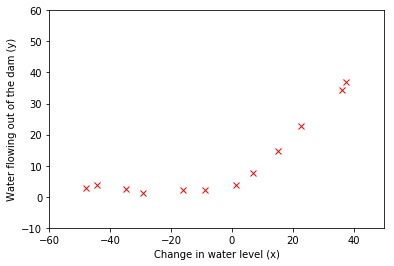

In [4]:
plt.plot(X,y, 'rx')
plt.axis([-60, 50, -10, 60])
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

In [5]:
def model_error(yPredict, yActual):
    return mean_squared_error(yPredict, yActual)

In [6]:
def model_training(_input, _output, _lambda=0):
    lasso = Lasso(alpha=_lambda)
    lasso.fit(_input, _output)
    return lasso

In [7]:
lr_model = model_training(X, y, _lambda=1)
print('Model error ', model_error(lr_model.predict(X), y))

Model error  44.7490279932


In [8]:
def plot_lr_model(_input, weights, bias, degree):
    m,_ = _input.shape
    _output = np.zeros((m,1))
    for i in range(m):
        for j in range(degree):
            _output[i] += weights[j] * (_input[i] ** (j+1))
        _output[i] += bias
    
    return _output

#### Visualize linear regression model

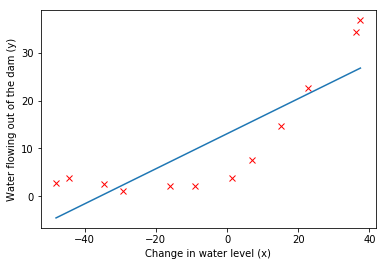

In [9]:
plt.plot(X, y, 'rx')
X_min = X[np.argmin(X)]
X_max = X[np.argmax(X)]
lr_input = np.array([X_min, X_max])
plt.plot(lr_input, plot_lr_model(lr_input, lr_model.coef_, lr_model.intercept_, 1))
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

####  Add polynomial features to our model

In [10]:
poly = PolynomialFeatures(3, include_bias=False)
X_poly = poly.fit_transform(X)
X_val_poly = poly.fit_transform(X_val)
lr_model = model_training(X_poly, y, _lambda=5)
print('Model error ', model_error(lr_model.predict(X_poly), y))

Model error  1.66847378281


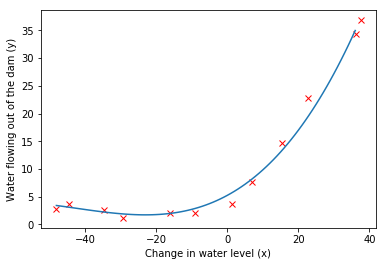

In [11]:
plt.plot(X, y, 'rx')
X_min = X[np.argmin(X)]
X_max = X[np.argmax(X)]
lr_input = np.arange(int(X_min), int(X_max))
lr_input = np.reshape(lr_input, (lr_input.shape[0], 1))
plt.plot(lr_input, plot_lr_model(lr_input, lr_model.coef_, lr_model.intercept_, 3))
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

#### Using Scikit Learn Linear Regression

In [12]:
def sk_learning_curve(X, y, Xval, yval, lbd):
    m,_ = X.shape
    err_train = np.zeros((m, 1))
    err_validate = np.zeros((m, 1))
    lr = Lasso(alpha=lbd)
    for i in range(m):
        lr.fit(X[0:i+1,:], y[0:i+1])
        err_train[i] = mean_squared_error(lr.predict(X[0:i+1,:]), y[0:i+1])
        err_validate[i] = mean_squared_error(lr.predict(Xval), yval)
        
    return (err_train, err_validate)

In [13]:
def visualize_learning_curve(X, y, X_val, y_val, lbd=0):
    err_train, error_validate = sk_learning_curve(X, y, X_val, y_val, lbd)
    plt.plot(range(err_train.shape[0]), err_train)
    plt.plot(range(error_validate.shape[0]), error_validate)
    plt.legend(["Train error", "Validation error"])
    plt.title('Learning curve for linear regression')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.show()

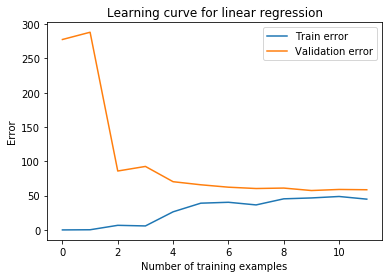

In [14]:
visualize_learning_curve(X, y, X_val, y_val, 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


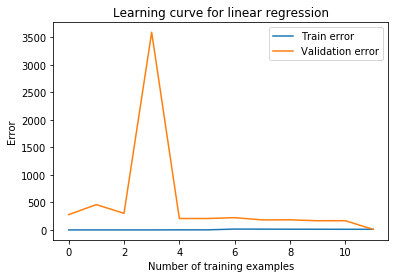

In [51]:
poly = PolynomialFeatures(6, include_bias=False)
X_poly = poly.fit_transform(X)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_test)
visualize_learning_curve(X_poly, y, X_val_poly, y_val, 10000)

#### Plot validation curve to find optimal value for regularized term $\lambda$

In [29]:
def validation_curve(Xtrain, ytrain, Xval, yval, poly_degree, lambda_range):
    """
    Plot validation curve to find optimal lambda
    Input : 
            Xtrain(ndarray) : training input
            ytrain(ndarray) : training label
            Xval  (ndarray) : validation input
            yval  (ndarray) : validation label
            lambda_range(list) : list of lambda for linear regression model
    """
    lr = Lasso()
    m = len(lambda_range)
    err_train = np.zeros((m, 1))
    err_validate = np.zeros((m, 1))
    
    # Add polynomial features
    poly = PolynomialFeatures(poly_degree, include_bias=False)
    Xtrain = poly.fit_transform(Xtrain)
    Xval = poly.fit_transform(Xval)
    
    for i, lambda_ in enumerate(lambda_range):
        lr.alpha = lambda_
        lr.fit(Xtrain, ytrain)
        err_train[i] = mean_squared_error(lr.predict(Xtrain), ytrain)
        err_validate[i] = mean_squared_error(lr.predict(Xval), yval)
        
    plt.plot(lambda_range, err_train)
    plt.plot(lambda_range, err_validate)
    plt.legend(["train", "Cross-validate"])
    plt.xlabel('lambda')
    plt.ylabel('error')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


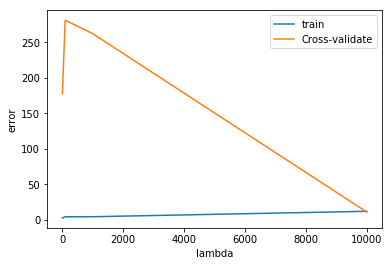

In [42]:
_lambdas = [10, 100, 1000, 10000]
validation_curve(X, y, X_val, y_val, 6,_lambdas)